# Heart Disease Prediction

## Table of Content
- [Cross Industry Standard Process for Data Mining (CRISP-DM)](#cross-industry-standard-process-for-data-mining-crisp-dm)
    - [Business Understanding](#business-understanding)
    - [Data Understanding](#data-understanding)
    - [Data Preparation](#data-preparation)
    - [Modeling](#modeling)
    - [Evaluation](#evaluation)
    - [Deployment](#deployment)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Data Preprocessing](#data-pre-processing)
- [Machine Learning Modelling](#machine-learning-modelling)
    - [Logistic Regression](#logistic-regression)
    - [K Nearest Neighbors](#k-nearest-neighbors)
    - [Decision Tree](#decision-tree)
    - [Random Forest](#random-forest)
- [Result Evaluation and Interpretation](#result-evaluation-and-interpretation)
- [Conclusion](#conclusion)
- [References](#references)

In [7]:
# Change the working directory to root
import os, re
curPath = os.getcwd()
match = re.search(pattern=r"^.+?heart-disease-prediction", string=curPath, flags=re.IGNORECASE) # replace the pattern string with root directory name
rootPath = match.group()
os.chdir(rootPath)
os.getcwd()

'd:\\Projects\\DataScience-Projects\\Heart-Disease-Prediction'

In [8]:
import pandas as pd
import numpy as np 
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
# Preprocessing and Evaluation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score,confusion_matrix
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier

In [9]:
from scripts_python.custom import inspect_df_na,select_features

In [10]:
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns", None)

In [11]:
DataFilePath = "./data/heart_2022_with_nans.csv"

In [12]:
df = pd.read_csv(DataFilePath) # Original data

## Cross Industry Standard Process for Data Mining (CRISP-DM)
---
[Table of Content](#table-of-content)

CRISP-DM is a methodology or approach to develop and implement a data science project. It consists of 6 stages.
1. [Business Understanding](#business-understanding)
1. [Data Understanding](#data-understanding)
1. [Data Preparation](#data-preparation)
1. [Modeling](#modeling)
1. [Evaluation](#evaluation)
1. [Deployment](#deployment)

### Business Understanding
---
The business understanding for current project is to develop a model for heart disease prediction where user can assess their own health pertaining to the chances of having heart disease. There are a few objectives to achieve the stated aim. 
1. To obtain relevant information and domain data for the heart disease prediction.
1. To analyse the relationship between the features and target value which is the existence of heart disease.
1. To develop a high accuracy classification model.
1. To deploy the model in a simple Python application framework with simple GUI. 

### Data Understanding
---
The data understanding for this project start from stating the source of the data and then proceed to discuss the dataset's characteristics and statistics. The details of the analysis are shown in the subsequent section of exploratory data analysis.
#### Background
The dataset is retrieved from the Kaggle website, "[Indicators of Heart Disease (2022 UPDATE)](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/)" where it was first compiled by author, Kamil Pytlak. The origin of the data is from the Centers of Disease Control and Prevention (CDC) where there is a telephone survey program called Behavioral Risk Factor Surveillance System (BRFSS) tasked with collecting the health-related information from the U.S. residents. The program touted its huge number of respondents of 400,000 across the nation. The 2022 BRFSS data can be found on the website, "[2022 BRFSS Survey Data and Documentation](https://www.cdc.gov/brfss/annual_data/annual_2022.html)" where the author initially retrieved the dataset. The specific codes and meta-information can be found on the author's GitHub repository, https://github.com/kamilpytlak/data-science-projects/tree/main/heart-disease-prediction/2022. It is also worth mentioning that the dataset had gone through an initial selection to reduce the variables from 300 to 40 which are relevant to the heart disease prediction. 
#### Data Characteristics 
Starting off with the original dataset shape which contained the null values, it is a 445132 by 40 dataset. There are 39 features with 1 target variable span over 445132 individuals. There are 4 big categories for the features which are: (1) Demography, (2) Anthropometry, (3) Medical Conditions, and (4) Lifestyle. From these 39 features, we can tell that there are 33 categorical data and 6 numerical data. 

From these features, we will perform an initial selection where the features that are of no interest to the topic will be omitted like the Dental, Vaxination, Covid19 and HIV statuses. Features that had a different representation will also be omitted to prevent the colinearity issue. For example, the height and weight will be omitted due to the information are contained in the BMI feature. After the selection, there are 17 categorical feature and 4 numberical features. 

Then, the data are visualized with box plot and histogram to study its statistical values and distribution. From the plots, it can be seen that the data is imbalanced with most of the respondent does not have heart disease. The box plot for the numerical features with respect to the target shows some correlation for PhysicalHealthDays where most of the heart disease patient has higher number of PhysicalHealthDay while the other 3 does not indicate much differences. In addition, the distribution plot show that only 2 numerical features, SleepHour and BMI, have a near normal distribution. Thus, MinMaxScaler and StandardScaler need to be used for non-normal and near-normal features respectively.

A data correlation matrix is also generated to study the relationship between the target values with the features. It is worth noting that only 9 features are quite significant (|corr|>0.1) which are: (1) GeneralHealth, (2) HadAngina, (3) HadStroke, (4) HadCOPD, (5) HadKidneyDisease, (6) HadArthritis, (7) HadDiabetes, (8) AgeCategory, and (9) PhysicalHealthDays. 

Lastly, the data quality is assessed by taking the ratio or percentage of number of non-null data points over total number of data points. So, for the data points of 445132 $ \times $ 22, it is 97.5%. On the other hand, if considering any rows of data with null value as invalid data, then, for a total of 445132 data row, there is a 74.1% of valid data. 

### Data Preparation
---
At the data preparation stage, there would be 2 set of data with the first set of data containing 21 features and second set of data has 11 features. From the previous EDA or Data Understanding stage, the data can be seen to contain categorical features. These features will need to be converted to numerical data with the use of package `OrdinalEncoder` and `OneHotEncoder`. 

Subsequently, the features will be selected based on the mutual information techniques where the package, `mutual_info_classif`, will be used. At this point, there will be 2 datasets where 1 with 21 features and another with reduced features. 

Then, the datasets are split with the package, `train_test_split`, before further processing of scaling will be done on the datasets. The standard scaler, `StandardScaler`, will be applied to the near normal numerical features, while the rest of the features will be scaled with, `MinMaxScaler`. 

### Modeling
---
There are 4 models used to predict the heart disease. These models are: (1) Logistic Regression, (2) K Nearest Neighbors, (3) Decision Tree, and (4) Random Forest. An additional technique, balanced bagging, is used to deal with the imbalanced dataset with the training dataset containing more non heart disease patients than heart disease patient. Thus, there would be 8 models in total with the stated models combining with balanced bagging technique. 
- [Logistic Regression](#logistic-regression)
- [K Nearest Neighbors](#k-nearest-neighbors)
- [Decision Tree](#decision-tree)
- [Random Forest](#random-forest)

### Evaluation
---
The evaluation on the models will be done using 4 main metrics which are: (1) Precision, (2) Recall, (3) F1, and (4) ROC AUC. The emphasis should be placed on the Recall score given that the score reflects the capability of the models to correctly identify heart disease from negative prediction while precision only indicate the models inclination to give false positive. This translates to the desire to minimize the false negative rate where the models would give a negative prediction but in reality, the patient would have heart disease. This is to say that the evaluation would aim to minimize false negative in contrast to false positive. 

### Deployment
---
The deployment of the system will be done in the basic web-app-db architecture where it could be implemented with Django, PostgreSQL, and MinIO. The Django system is used to hold the GUI and application logic to generate new dataset and visualization purpose. The PostgreSQL database will be used to hold the datasets from the user while the MinIO object storage will be used to store the Machine Learning models. 

<img src="./resources/Deployment_Diagram_1.png" width="500">

## Exploratory Data Analysis
---
[Table of Content](#table-of-content)

In [13]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [15]:
numerical_features = df.dtypes.to_frame()[0][(df.dtypes.to_frame()[0] == 'float64')].index.tolist()
for i in enumerate(numerical_features, 1):
    print(i)

(1, 'PhysicalHealthDays')
(2, 'MentalHealthDays')
(3, 'SleepHours')
(4, 'HeightInMeters')
(5, 'WeightInKilograms')
(6, 'BMI')


In [16]:
categorical_features = df.dtypes.to_frame()[0][(df.dtypes.to_frame()[0] != 'float64')].index.tolist()
for i in enumerate(categorical_features, 1):
    print(i)

(1, 'State')
(2, 'Sex')
(3, 'GeneralHealth')
(4, 'LastCheckupTime')
(5, 'PhysicalActivities')
(6, 'RemovedTeeth')
(7, 'HadHeartAttack')
(8, 'HadAngina')
(9, 'HadStroke')
(10, 'HadAsthma')
(11, 'HadSkinCancer')
(12, 'HadCOPD')
(13, 'HadDepressiveDisorder')
(14, 'HadKidneyDisease')
(15, 'HadArthritis')
(16, 'HadDiabetes')
(17, 'DeafOrHardOfHearing')
(18, 'BlindOrVisionDifficulty')
(19, 'DifficultyConcentrating')
(20, 'DifficultyWalking')
(21, 'DifficultyDressingBathing')
(22, 'DifficultyErrands')
(23, 'SmokerStatus')
(24, 'ECigaretteUsage')
(25, 'ChestScan')
(26, 'RaceEthnicityCategory')
(27, 'AgeCategory')
(28, 'AlcoholDrinkers')
(29, 'HIVTesting')
(30, 'FluVaxLast12')
(31, 'PneumoVaxEver')
(32, 'TetanusLast10Tdap')
(33, 'HighRiskLastYear')
(34, 'CovidPos')


In [17]:
# Initial Selection
numerical_features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI']
categorical_features = [
    'Sex',
    'GeneralHealth',
    'PhysicalActivities',
    #  'HadHeartAttack',
    'HadAngina',
    'HadStroke',
    'HadAsthma',
    'HadSkinCancer',
    'HadCOPD',
    'HadDepressiveDisorder',
    'HadKidneyDisease',
    'HadArthritis',
    'HadDiabetes',
    'SmokerStatus',
    'ECigaretteUsage',
    'RaceEthnicityCategory',
    'AgeCategory',
    'AlcoholDrinkers'
    ]
target = ['HadHeartAttack']

In [18]:
for i in enumerate(numerical_features, 1):
    print(i)
print("#"*60)
for i in enumerate(categorical_features, 1):
    print(i)

df_1 = df.loc[:,numerical_features+categorical_features+target]

(1, 'PhysicalHealthDays')
(2, 'MentalHealthDays')
(3, 'SleepHours')
(4, 'BMI')
############################################################
(1, 'Sex')
(2, 'GeneralHealth')
(3, 'PhysicalActivities')
(4, 'HadAngina')
(5, 'HadStroke')
(6, 'HadAsthma')
(7, 'HadSkinCancer')
(8, 'HadCOPD')
(9, 'HadDepressiveDisorder')
(10, 'HadKidneyDisease')
(11, 'HadArthritis')
(12, 'HadDiabetes')
(13, 'SmokerStatus')
(14, 'ECigaretteUsage')
(15, 'RaceEthnicityCategory')
(16, 'AgeCategory')
(17, 'AlcoholDrinkers')


#### Box Plot
http://127.0.0.1:8051

In [19]:
app = Dash(name='app_1')

app.layout = html.Div([
    html.H4("Analysis of the numerical data with categorical data"),
    html.P("x-axis:"),
    dcc.RadioItems(
        id='x-axis', 
        options=categorical_features+target,
        value='HadHeartAttack', 
        inline=True
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=numerical_features,
        value='BMI', 
        inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("x-axis", "value"), 
    Input("y-axis", "value"))
def generate_chart(x, y):
    df = df_1 # replace with your own data source
    fig = px.box(df, x=x, y=y)
    return fig


app.run_server(debug=True,port=8051)

#### Histogram
http://127.0.0.1:8052

In [20]:
app = Dash(name='app_2')

app.layout = html.Div([
    html.H4("Analysis of the Distribution"),
    html.P("Features: "),
    dcc.RadioItems(
        id='x-axis', 
        options=numerical_features+categorical_features,
        value='PhysicalHealthDays', 
        inline=True
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    Input("x-axis","value"))
def display_graph(x):
    df = df_1 # replace with your own data source
    fig = px.histogram(df, x=x, color="HadHeartAttack")
    return fig

app.run_server(debug=True,port=8052)

#### Data Quality

In [21]:
inspect_df_na(df_1)

Null values count by columns : 

('PhysicalHealthDays', 10927)
('MentalHealthDays', 9067)
('SleepHours', 5453)
('BMI', 48806)
('Sex', 0)
('GeneralHealth', 1198)
('PhysicalActivities', 1093)
('HadAngina', 4405)
('HadStroke', 1557)
('HadAsthma', 1773)
('HadSkinCancer', 3143)
('HadCOPD', 2219)
('HadDepressiveDisorder', 2812)
('HadKidneyDisease', 1926)
('HadArthritis', 2633)
('HadDiabetes', 1087)
('SmokerStatus', 35462)
('ECigaretteUsage', 35660)
('RaceEthnicityCategory', 14057)
('AgeCategory', 9079)
('AlcoholDrinkers', 46574)
('HadHeartAttack', 3065)
--------------------------------------------

Total number of null values : 241996
--------------------------------------------

The number of row with null values 115469
--------------------------------------------



,PhysicalHealthDays,MentalHealthDays,SleepHours,BMI,Sex,GeneralHealth,PhysicalActivities,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HadHeartAttack
0,0.0,0.0,8.0,NaN,Female,Very good,No,No,No,No,No,No,No,No,No,Yes,Never smoked,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,No,No
3,0.0,0.0,7.0,23.30,Female,Excellent,Yes,No,No,Yes,No,No,No,No,Yes,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",NaN,No,No
8,0.0,0.0,6.0,NaN,Female,Good,Yes,No,No,No,Yes,No,No,No,Yes,No,Former smoker,Not at all (right now),"White only, Non-Hispanic",Age 75 to 79,No,No
15,0.0,0.0,8.0,25.97,Female,Excellent,Yes,No,No,No,No,No,No,No,No,No,NaN,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,No,No
16,0.0,0.0,6.0,24.69,Female,Excellent,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",NaN,No,No
22,30.0,0.0,7.0,NaN,Female,Fair,Yes,Yes,No,No,Yes,No,No,No,Yes,No,NaN,NaN,"White only, Non-Hispanic",Age 80 or older,NaN,No
34,NaN,0.0,10.0,19.37,Female,Fair,Yes,Yes,No,No,No,No,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,No,Yes
38,8.0,0.0,6.0,NaN,Male,Very good,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN,"White only, Non-Hispanic",Age 70 to 74,NaN,Yes
53,0.0,NaN,6.0,32.28,Male,Very good,No,No,No,Yes,No,Yes,No,No,Yes,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 70 to 74,Yes,Yes
56,0.0,0.0,6.0,33.89,Female,Fair,No,No,No,No,No,No,Yes,Yes,Yes,No,NaN,NaN,"White only, Non-Hispanic",Age 70 to 74,NaN,Yes


(97.52886375685905, 74.05960479138773)

## Data Pre-processing
---
[Table of Content](#table-of-content)

In [22]:
df_2 = df_1.dropna().reset_index(drop=True)
df_2.shape

(329663, 22)

In [23]:
cat_1 = ['Female','Male']
cat_2 = ['Poor','Fair','Good','Very good','Excellent']
cat_3 = ['No','Yes']
cat_4 = ['No','No, pre-diabetes or borderline diabetes','Yes, but only during pregnancy (female)','Yes']
cat_5 = ['Age 18 to 24','Age 25 to 29', 'Age 30 to 34','Age 35 to 39','Age 40 to 44','Age 45 to 49','Age 50 to 54','Age 55 to 59','Age 60 to 64','Age 65 to 69','Age 70 to 74','Age 75 to 79','Age 80 or older']
cat_6 = ['Never smoked','Former smoker','Current smoker - now smokes some days','Current smoker - now smokes every day']
cat_7 = ['Never used e-cigarettes in my entire life','Not at all (right now)','Use them some days','Use them every day']
cat_8 = ['White only, Non-Hispanic','Black only, Non-Hispanic','Other race only, Non-Hispanic','Multiracial, Non-Hispanic','Hispanic'] # onehot encode

In [24]:
cols_1 = ['Sex']
cols_2 = ['GeneralHealth']
cols_3_1 = ['PhysicalActivities']
cols_3_2 = ['HadHeartAttack']
cols_3_3 = ['HadAngina']
cols_3_4 = ['HadStroke']
cols_3_5 = ['HadAsthma']
cols_3_6 = ['HadSkinCancer']
cols_3_7 = ['HadCOPD']
cols_3_8 = ['HadDepressiveDisorder']
cols_3_9 = ['HadKidneyDisease']
cols_3_10 = ['HadArthritis']
cols_3_11 = ['AlcoholDrinkers']
cols_4 = ['HadDiabetes']
cols_5 = ['AgeCategory']
cols_6 = ['SmokerStatus']
cols_7 = ['ECigaretteUsage']
cols_8 = ['RaceEthnicityCategory']

In [25]:
transformer = ColumnTransformer(transformers=[
    ('oe_1',OrdinalEncoder(categories=[cat_1]),cols_1),
    ('oe_2',OrdinalEncoder(categories=[cat_2]),cols_2),
    ('oe_3_1',OrdinalEncoder(categories=[cat_3]),cols_3_1),
    ('oe_3_2',OrdinalEncoder(categories=[cat_3]),cols_3_2),
    ('oe_3_3',OrdinalEncoder(categories=[cat_3]),cols_3_3),
    ('oe_3_4',OrdinalEncoder(categories=[cat_3]),cols_3_4),
    ('oe_3_5',OrdinalEncoder(categories=[cat_3]),cols_3_5),
    ('oe_3_6',OrdinalEncoder(categories=[cat_3]),cols_3_6),
    ('oe_3_7',OrdinalEncoder(categories=[cat_3]),cols_3_7),
    ('oe_3_8',OrdinalEncoder(categories=[cat_3]),cols_3_8),
    ('oe_3_9',OrdinalEncoder(categories=[cat_3]),cols_3_9),
    ('oe_3_10',OrdinalEncoder(categories=[cat_3]),cols_3_10),
    ('oe_3_11',OrdinalEncoder(categories=[cat_3]),cols_3_11),
    ('oe_4',OrdinalEncoder(categories=[cat_4]),cols_4),
    ('oe_5',OrdinalEncoder(categories=[cat_5]),cols_5),
    ('oe_6',OrdinalEncoder(categories=[cat_6]),cols_6),
    ('oe_7',OrdinalEncoder(categories=[cat_7]),cols_7),
    ('oe_8',OneHotEncoder(sparse_output=False),cols_8)
], remainder='passthrough')

In [26]:
transformer.fit(df_2)
transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('oe_1',
                                 OrdinalEncoder(categories=[['Female',
                                                             'Male']]),
                                 ['Sex']),
                                ('oe_2',
                                 OrdinalEncoder(categories=[['Poor', 'Fair',
                                                             'Good',
                                                             'Very good',
                                                             'Excellent']]),
                                 ['GeneralHealth']),
                                ('oe_3_1',
                                 OrdinalEncoder(categories=[['No', 'Yes']]),
                                 ['PhysicalActivities']),
                                ('oe_3_2',
                                 OrdinalEncoder(categories=[['No', 'Yes']]),...
                                 OrdinalEncoder(categories=[['Never smoked',
                                                             'Former smoker',
                                                             'Current smoker - '
                                                             'now smokes some '
                                                             'days',
                                                             'Current smoker - '
                                                             'now smokes every '
                                                             'day']]),
                                 ['SmokerStatus']),
                                ('oe_7',
                                 OrdinalEncoder(categories=[['Never used '
                                                             'e-cigarettes in '
                                                             'my entire life',
                                                             'Not at all '
                                                             '(right now)',
                                                             'Use them some '
                                                             'days',
                                                             'Use them every '
                                                             'day']]),
                                 ['ECigaretteUsage']),
                                ('oe_8', OneHotEncoder(sparse_output=False),
                                 ['RaceEthnicityCategory'])])

In [27]:
df_3 = transformer.transform(df_2)
df_3

,oe_1__Sex,oe_2__GeneralHealth,oe_3_1__PhysicalActivities,oe_3_2__HadHeartAttack,oe_3_3__HadAngina,oe_3_4__HadStroke,oe_3_5__HadAsthma,oe_3_6__HadSkinCancer,oe_3_7__HadCOPD,oe_3_8__HadDepressiveDisorder,oe_3_9__HadKidneyDisease,oe_3_10__HadArthritis,oe_3_11__AlcoholDrinkers,oe_4__HadDiabetes,oe_5__AgeCategory,oe_6__SmokerStatus,oe_7__ECigaretteUsage,"oe_8__RaceEthnicityCategory_Black only, Non-Hispanic",oe_8__RaceEthnicityCategory_Hispanic,"oe_8__RaceEthnicityCategory_Multiracial, Non-Hispanic","oe_8__RaceEthnicityCategory_Other race only, Non-Hispanic","oe_8__RaceEthnicityCategory_White only, Non-Hispanic",remainder__PhysicalHealthDays,remainder__MentalHealthDays,remainder__SleepHours,remainder__BMI
0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,26.57
1,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,25.61
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,9.0,21.77
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,26.08
4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,22.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329658,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,7.0,29.86
329659,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,31.19
329660,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,7.0,28.66
329661,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,32.55


### Correlation Matrix

<Axes: >

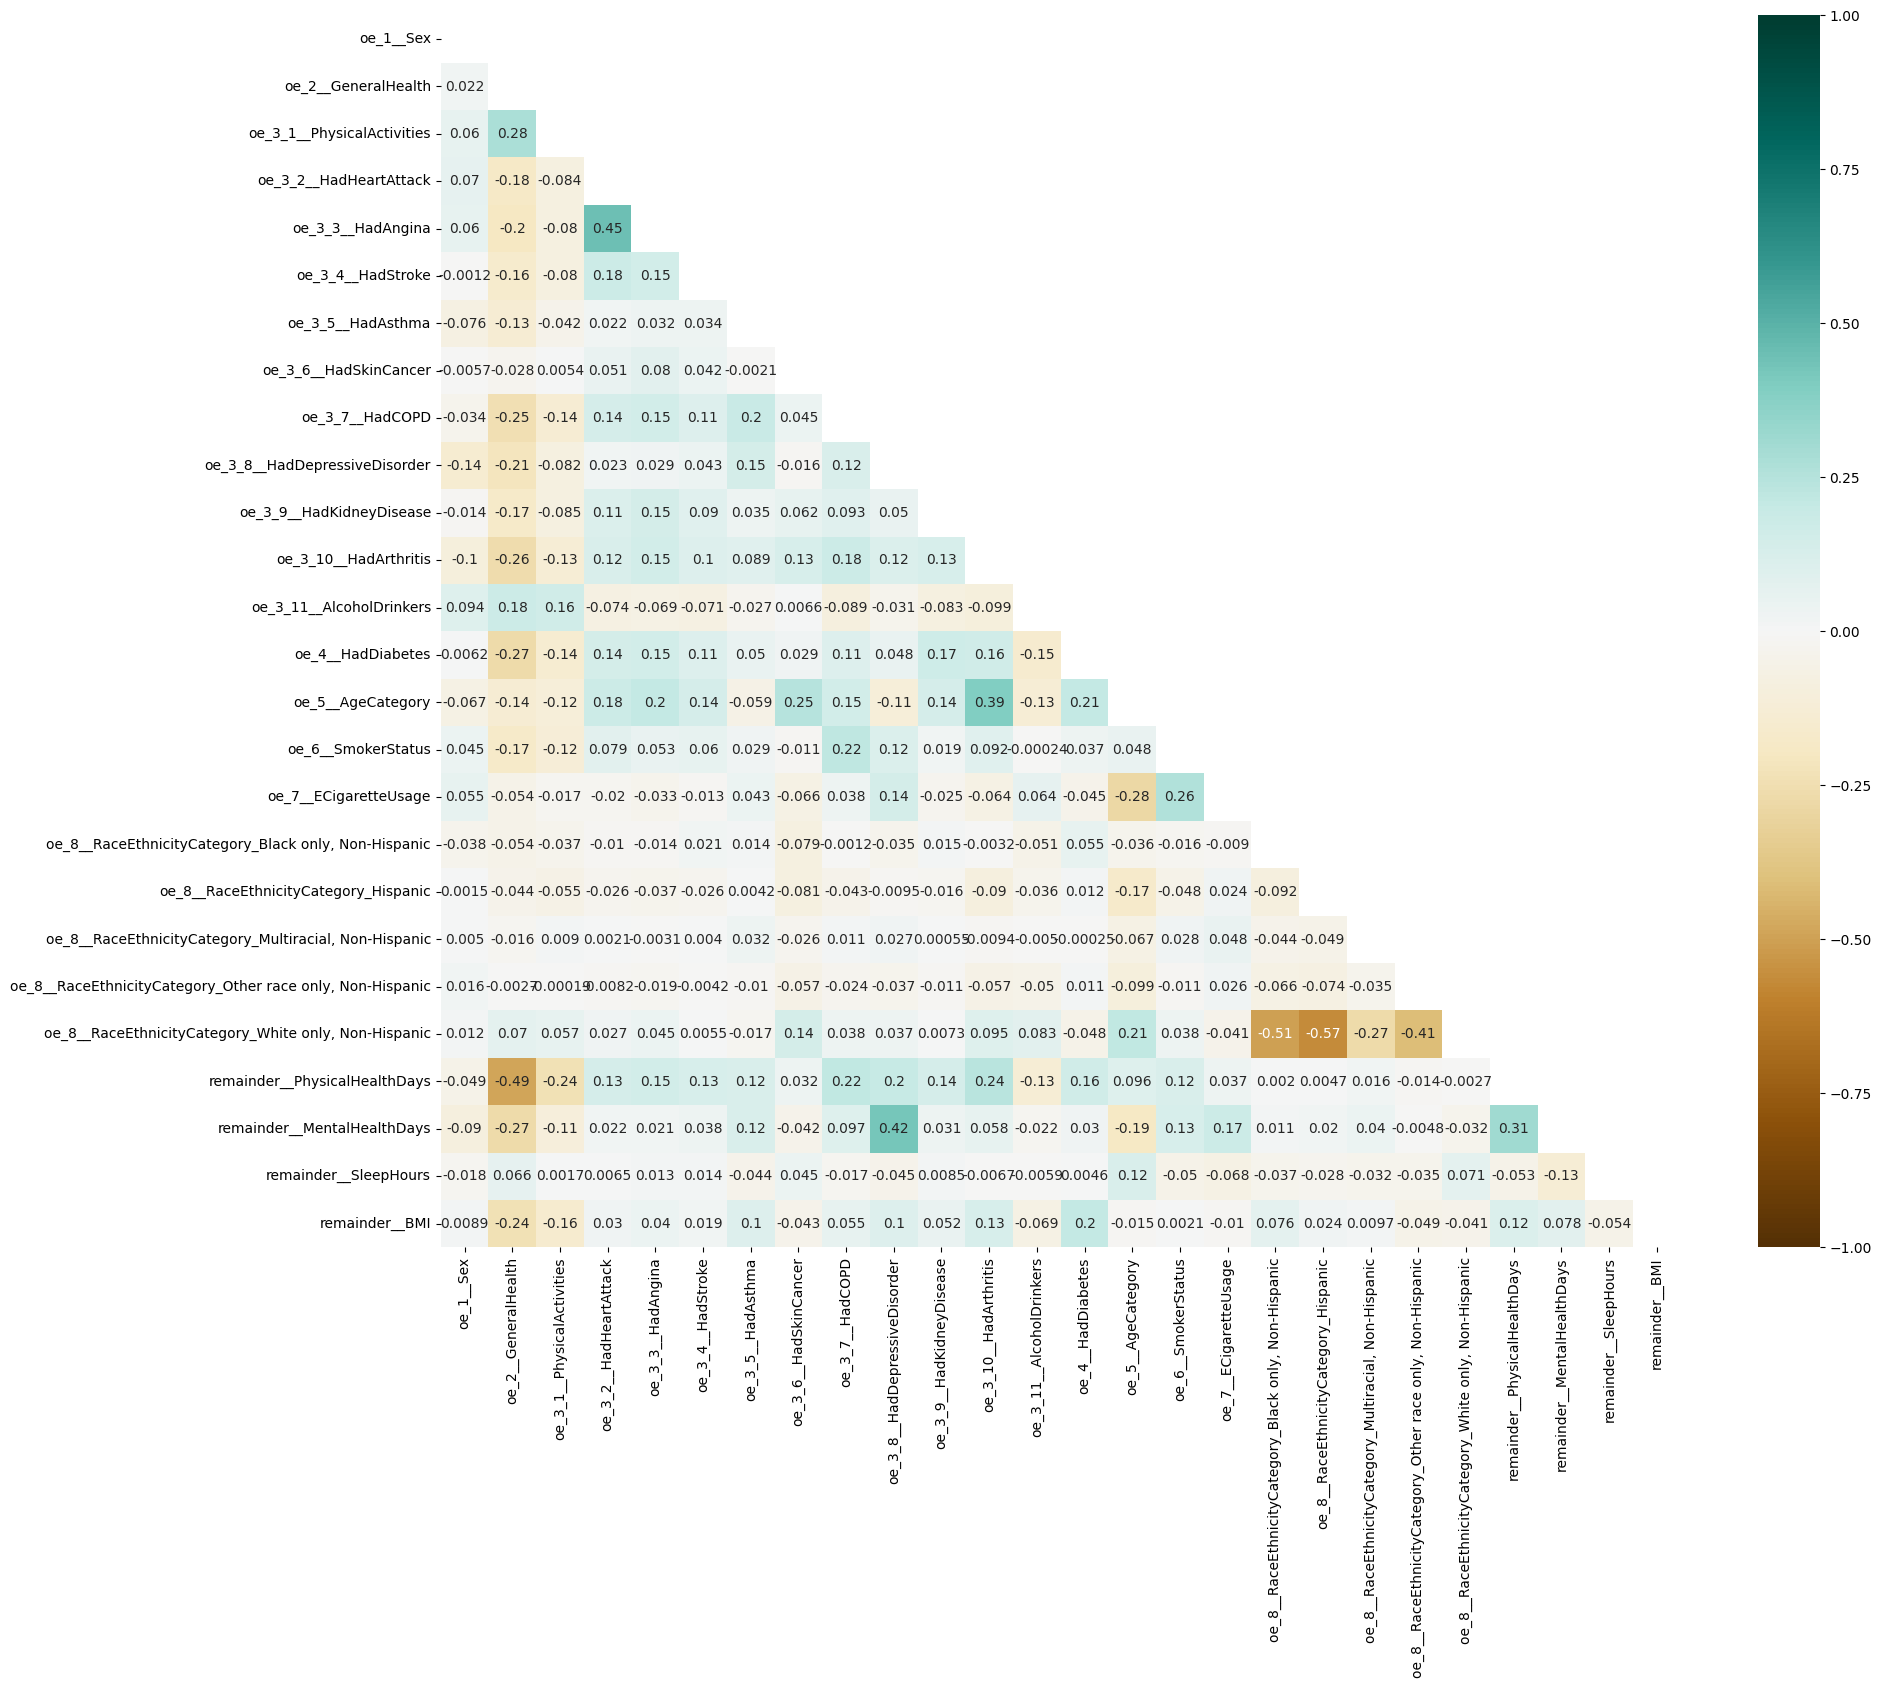

In [28]:
corr = df_3.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, ax=ax, annot=True, cmap='BrBG')

### Feature Selection with Mutual Information Technique

In [29]:
X = df_3.drop(columns=['oe_3_2__HadHeartAttack'])
y = df_3['oe_3_2__HadHeartAttack']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20240101)
X_train_fs, X_test_fs, fs = select_features(X_train,y_train,X_test)
total_features_name = fs.get_feature_names_out()
total_features_score = fs.scores_

In [31]:
res = dict(zip(total_features_name,total_features_score))
res_sorted = dict(sorted(res.items(), reverse=True, key=lambda x: x[1]))


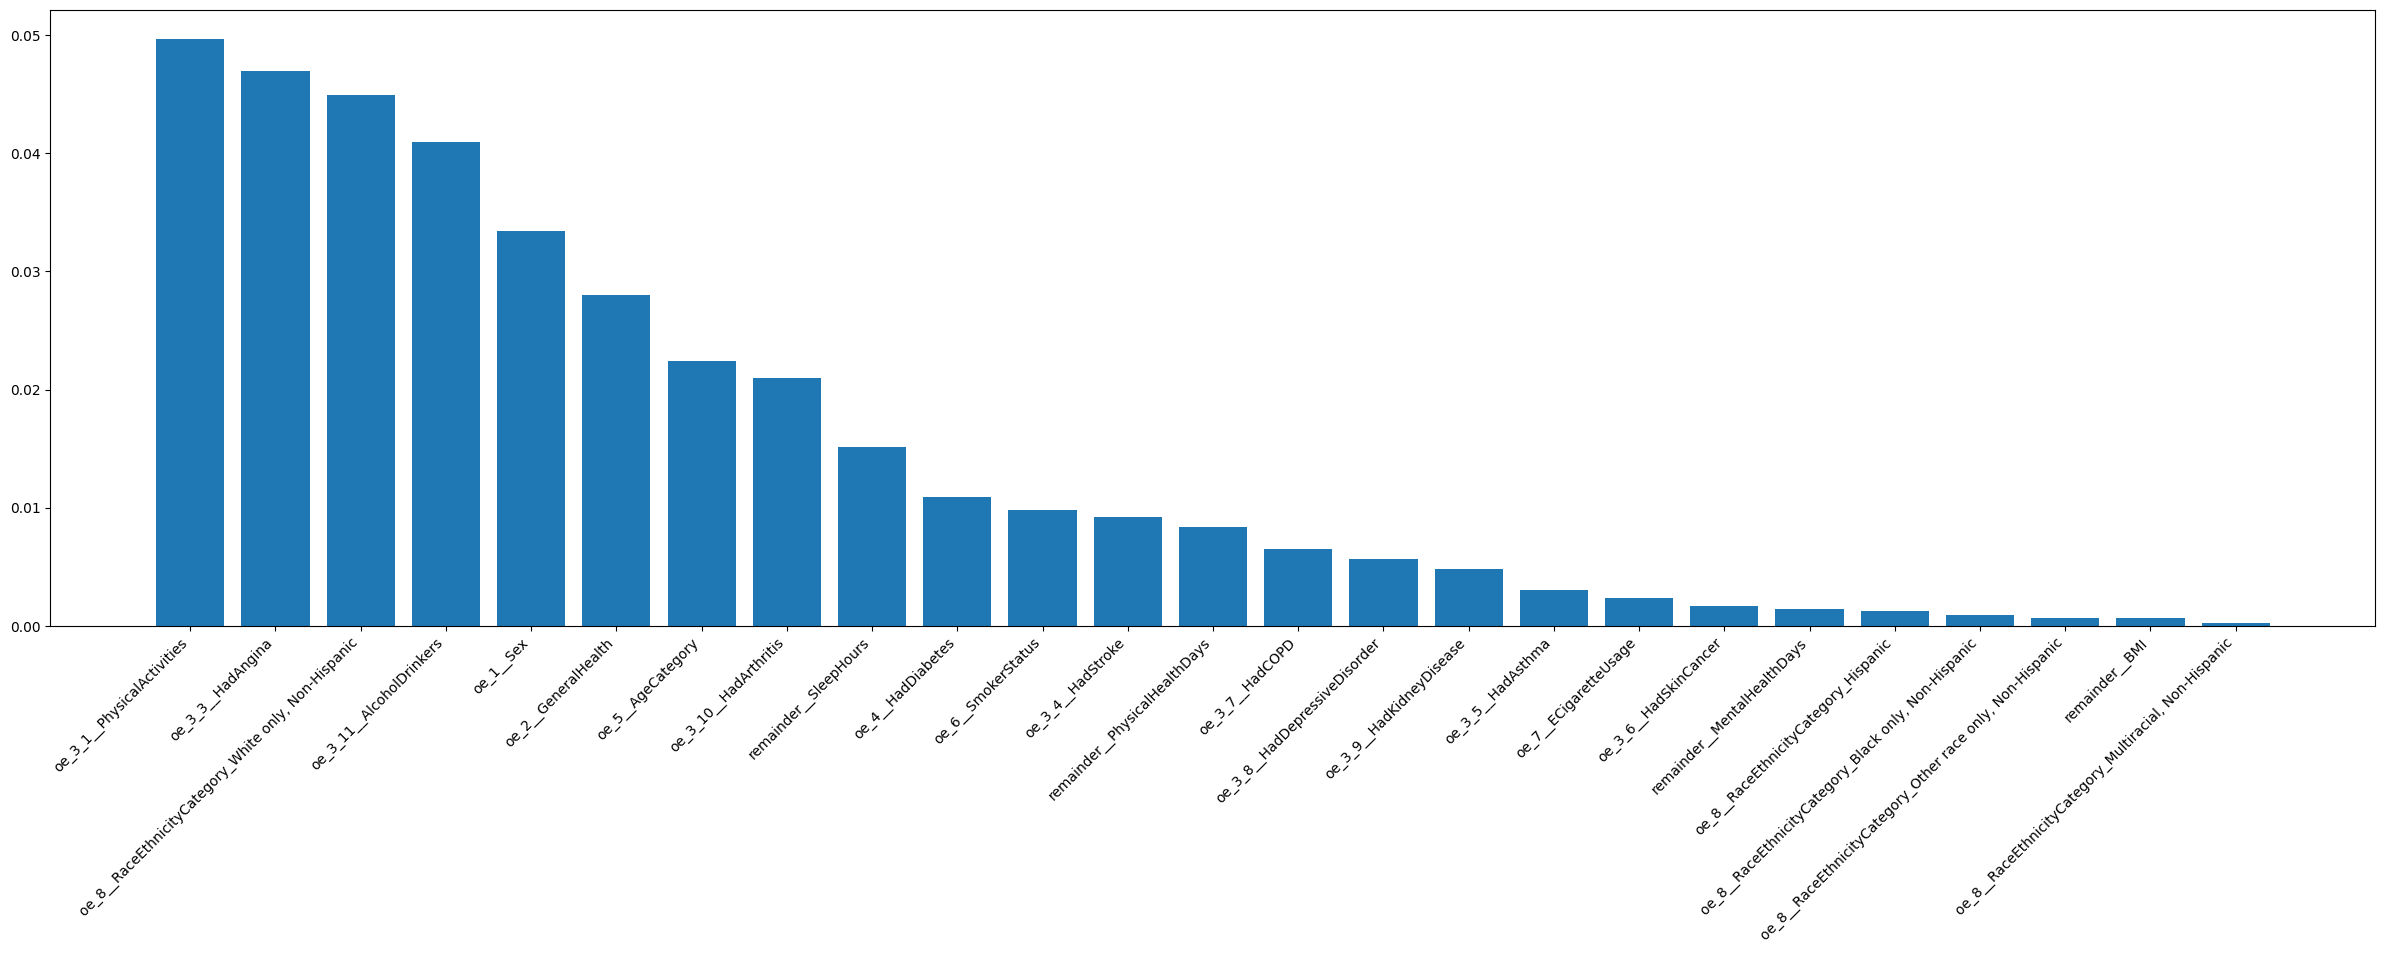

In [32]:
plt.figure(figsize=(30,8))
# plt.bar([i for i in total_features_name], total_features_score)
plt.bar(res_sorted.keys(), res_sorted.values())
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
selected_features = list()
for i in res_sorted.items():
    if i[1] > 0.01:
        selected_features.append(i[0])
selected_features

['oe_3_1__PhysicalActivities',
 'oe_3_3__HadAngina',
 'oe_8__RaceEthnicityCategory_White only, Non-Hispanic',
 'oe_3_11__AlcoholDrinkers',
 'oe_1__Sex',
 'oe_2__GeneralHealth',
 'oe_5__AgeCategory',
 'oe_3_10__HadArthritis',
 'remainder__SleepHours',
 'oe_4__HadDiabetes']

In [34]:
df_4 = df_3.loc[:,selected_features+['oe_3_2__HadHeartAttack']]
df_4

,oe_3_1__PhysicalActivities,oe_3_3__HadAngina,"oe_8__RaceEthnicityCategory_White only, Non-Hispanic",oe_3_11__AlcoholDrinkers,oe_1__Sex,oe_2__GeneralHealth,oe_5__AgeCategory,oe_3_10__HadArthritis,remainder__SleepHours,oe_4__HadDiabetes,oe_3_2__HadHeartAttack
0,0.0,0.0,1.0,0.0,0.0,4.0,12.0,0.0,6.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,3.0,7.0,0.0,5.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,1.0,4.0,0.0,9.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,12.0,0.0,7.0,3.0,1.0
4,1.0,0.0,0.0,1.0,0.0,3.0,12.0,0.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
329658,1.0,0.0,0.0,1.0,1.0,2.0,9.0,1.0,7.0,3.0,0.0
329659,1.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,8.0,0.0,0.0
329660,1.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0,7.0,0.0,0.0
329661,0.0,0.0,0.0,0.0,1.0,3.0,10.0,0.0,5.0,0.0,1.0


### Normalization and Standardization

In [35]:
df_3

,oe_1__Sex,oe_2__GeneralHealth,oe_3_1__PhysicalActivities,oe_3_2__HadHeartAttack,oe_3_3__HadAngina,oe_3_4__HadStroke,oe_3_5__HadAsthma,oe_3_6__HadSkinCancer,oe_3_7__HadCOPD,oe_3_8__HadDepressiveDisorder,oe_3_9__HadKidneyDisease,oe_3_10__HadArthritis,oe_3_11__AlcoholDrinkers,oe_4__HadDiabetes,oe_5__AgeCategory,oe_6__SmokerStatus,oe_7__ECigaretteUsage,"oe_8__RaceEthnicityCategory_Black only, Non-Hispanic",oe_8__RaceEthnicityCategory_Hispanic,"oe_8__RaceEthnicityCategory_Multiracial, Non-Hispanic","oe_8__RaceEthnicityCategory_Other race only, Non-Hispanic","oe_8__RaceEthnicityCategory_White only, Non-Hispanic",remainder__PhysicalHealthDays,remainder__MentalHealthDays,remainder__SleepHours,remainder__BMI
0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,26.57
1,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,25.61
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,9.0,21.77
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,26.08
4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,22.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329658,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,7.0,29.86
329659,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,31.19
329660,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,7.0,28.66
329661,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,32.55


In [36]:
mmScale = MinMaxScaler()
stdScale = StandardScaler()
df_temp_1 = df_3.drop(columns=['remainder__SleepHours','remainder__BMI','oe_3_2__HadHeartAttack'])
df_temp_2 = df_3.loc[:,['remainder__SleepHours','remainder__BMI']]
df_3_mmscaled = pd.DataFrame(mmScale.fit_transform(df_temp_1),columns=df_temp_1.columns)
df_3_stdscaled = pd.DataFrame(stdScale.fit_transform(df_temp_2),columns=df_temp_2.columns)
df_3_scaled = pd.concat([df_3_mmscaled,df_3_stdscaled,df_3.oe_3_2__HadHeartAttack.to_frame()],axis=1)
df_3_scaled

,oe_1__Sex,oe_2__GeneralHealth,oe_3_1__PhysicalActivities,oe_3_3__HadAngina,oe_3_4__HadStroke,oe_3_5__HadAsthma,oe_3_6__HadSkinCancer,oe_3_7__HadCOPD,oe_3_8__HadDepressiveDisorder,oe_3_9__HadKidneyDisease,oe_3_10__HadArthritis,oe_3_11__AlcoholDrinkers,oe_4__HadDiabetes,oe_5__AgeCategory,oe_6__SmokerStatus,oe_7__ECigaretteUsage,"oe_8__RaceEthnicityCategory_Black only, Non-Hispanic",oe_8__RaceEthnicityCategory_Hispanic,"oe_8__RaceEthnicityCategory_Multiracial, Non-Hispanic","oe_8__RaceEthnicityCategory_Other race only, Non-Hispanic","oe_8__RaceEthnicityCategory_White only, Non-Hispanic",remainder__PhysicalHealthDays,remainder__MentalHealthDays,remainder__SleepHours,remainder__BMI,oe_3_2__HadHeartAttack
0,0.0,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,-0.710616,-0.306729,0.0
1,0.0,0.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.583333,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.066667,0.100000,-1.403264,-0.454226,0.0
2,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.066667,0.000000,1.367327,-1.044212,0.0
3,1.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.033333,0.000000,-0.017968,-0.382014,1.0
4,0.0,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.333333,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.017968,-0.861378,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329658,1.0,0.50,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.750000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.500000,-0.017968,0.198753,0.0
329659,1.0,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.674679,0.403097,0.0
329660,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.066667,0.066667,-0.017968,0.014383,0.0
329661,1.0,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.403264,0.612051,1.0


In [37]:
mmScale = MinMaxScaler()
stdScale = StandardScaler()
df_temp_1 = df_4.loc[:,selected_features].drop(columns=['remainder__SleepHours'])
df_temp_2 = df_4['remainder__SleepHours'].to_frame()
df_4_mmscaled = pd.DataFrame(mmScale.fit_transform(df_temp_1),columns=df_temp_1.columns)
df_4_stdscaled = pd.DataFrame(stdScale.fit_transform(df_temp_2),columns=df_temp_2.columns)
# df_temp_2
# df_4_stdscaled
df_4_scaled = pd.concat([df_4_mmscaled,df_4_stdscaled,df_4.oe_3_2__HadHeartAttack.to_frame()],axis=1)
df_4_scaled

,oe_3_1__PhysicalActivities,oe_3_3__HadAngina,"oe_8__RaceEthnicityCategory_White only, Non-Hispanic",oe_3_11__AlcoholDrinkers,oe_1__Sex,oe_2__GeneralHealth,oe_5__AgeCategory,oe_3_10__HadArthritis,oe_4__HadDiabetes,remainder__SleepHours,oe_3_2__HadHeartAttack
0,0.0,0.0,1.0,0.0,0.0,1.00,1.000000,0.0,0.0,-0.710616,0.0
1,1.0,0.0,1.0,0.0,0.0,0.75,0.583333,0.0,0.0,-1.403264,0.0
2,1.0,0.0,1.0,1.0,0.0,0.25,0.333333,0.0,0.0,1.367327,0.0
3,0.0,0.0,1.0,0.0,1.0,0.00,1.000000,0.0,1.0,-0.017968,1.0
4,1.0,0.0,0.0,1.0,0.0,0.75,1.000000,0.0,0.0,-0.017968,0.0
...,...,...,...,...,...,...,...,...,...,...,...
329658,1.0,0.0,0.0,1.0,1.0,0.50,0.750000,1.0,1.0,-0.017968,0.0
329659,1.0,0.0,1.0,1.0,1.0,0.50,0.166667,0.0,0.0,0.674679,0.0
329660,1.0,0.0,0.0,0.0,0.0,1.00,0.500000,0.0,0.0,-0.017968,0.0
329661,0.0,0.0,0.0,0.0,1.0,0.75,0.833333,0.0,0.0,-1.403264,1.0


## Machine Learning Modelling
---
[Table of Content](#table-of-content)

There are 4 ML models used for the classification problem. 
- [Logistic Regression](#logistic-regression)
- [K Nearest Neighbors](#k-nearest-neighbors)
- [Decision Tree](#decision-tree)
- [Random Forest](#random-forest)

In [38]:
StandardModels = dict()
BaggedModels = dict()

### Logistic Regression
There are 2 logistic regression models defined with the tuned hyperparameters. The first model is the standard logistic regression model while the second one is the bagged model. The tuned hyperparameters are `[solver='newton-cg',penalty='l2',C=0.01]`.

In [39]:
lr = LogisticRegression(solver='newton-cg',penalty='l2',C=0.01)
bbc_lr = BalancedBaggingClassifier(estimator=LogisticRegression(solver='newton-cg',penalty='l2',C=0.01),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=20240101)

In [40]:
StandardModels['lr'] = lr
BaggedModels['bbc_lr'] = bbc_lr

### K Nearest Neighbors

In [41]:
k = 3
knn = estimator=KNeighborsClassifier(n_neighbors=k)
bbc_knn = BalancedBaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=k),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=20240101)

In [42]:
StandardModels['knn'] = knn
BaggedModels['bbc_knn'] = bbc_knn

### Decision Tree

In [43]:
dt_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=20240101)
bbc_dt_gini = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=20240101),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=20240101)

In [44]:
StandardModels['dt_gini'] = dt_gini
BaggedModels['bbc_dt_gini'] = bbc_dt_gini

### Random Forest

In [45]:
rf = RandomForestClassifier(n_estimators=10,random_state=20240101)
brf = BalancedRandomForestClassifier(n_estimators=10,sampling_strategy='all',replacement=False,random_state=20240101)

In [46]:
StandardModels['rf'] = rf
BaggedModels['brf'] = brf

In [47]:
for i in StandardModels.items():
    print(i)

('lr', LogisticRegression(C=0.01, solver='newton-cg'))
('knn', KNeighborsClassifier(n_neighbors=3))
('dt_gini', DecisionTreeClassifier(max_depth=3, random_state=20240101))
('rf', RandomForestClassifier(n_estimators=10, random_state=20240101))


In [48]:
for i in BaggedModels.items():
    print(i)

('bbc_lr', BalancedBaggingClassifier(estimator=LogisticRegression(C=0.01,
                                                       solver='newton-cg'),
                          random_state=20240101))
('bbc_knn', BalancedBaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                          random_state=20240101))
('bbc_dt_gini', BalancedBaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                           random_state=20240101),
                          random_state=20240101))
('brf', BalancedRandomForestClassifier(n_estimators=10, random_state=20240101,
                               replacement=False, sampling_strategy='all'))


## Result Evaluation and Interpretation
---
[Table of Content](#table-of-content)

The metrics Precision, Recall, F1, and ROC AUC will be used for the assessment of these models. The metric results are shown in 3 stages:
- [Standard Models](#standard-models) (Logistic Regression, KNN, Decision Tree, Random Forest)
- [Bagged Models](#bagged-models)
- [Selected Features](#selected-features)

In [49]:
X = df_3_scaled.drop(columns=['oe_3_2__HadHeartAttack'])
y = df_3_scaled.oe_3_2__HadHeartAttack

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20240105)

### Standard Models

In [51]:
df_scores_1 = pd.DataFrame(columns=StandardModels.keys(), index=['precision','recall','f1','roc_auc'])
for i, j in StandardModels.items():
    j.fit(X_train,y_train)
    y_test_predict = j.predict(X_test)
    df_scores_1.loc['precision',i] = precision_score(y_test,y_test_predict)
    df_scores_1.loc['recall',i] = recall_score(y_test,y_test_predict)
    df_scores_1.loc['f1',i] = f1_score(y_test,y_test_predict)
    df_scores_1.loc['roc_auc',i] = roc_auc_score(y_test,y_test_predict)

df_scores_1

,lr,knn,dt_gini,rf
precision,0.585757,0.43575,0.583242,0.513186
recall,0.221884,0.200988,0.202318,0.18484
f1,0.321852,0.275091,0.300423,0.271788
roc_auc,0.606532,0.593178,0.597095,0.587492


### Bagged Models

In [52]:
df_scores_2 = pd.DataFrame(columns=BaggedModels.keys(), index=['precision','recall','f1','roc_auc'])
for i, j in BaggedModels.items():
    j.fit(X_train,y_train)
    y_test_predict = j.predict(X_test)
    df_scores_2.loc['precision',i] = precision_score(y_test,y_test_predict)
    df_scores_2.loc['recall',i] = recall_score(y_test,y_test_predict)
    df_scores_2.loc['f1',i] = f1_score(y_test,y_test_predict)
    df_scores_2.loc['roc_auc',i] = roc_auc_score(y_test,y_test_predict)

df_scores_2

,bbc_lr,bbc_knn,bbc_dt_gini,brf
precision,0.218551,0.184814,0.142085,0.187172
recall,0.743921,0.703267,0.824278,0.732333
f1,0.337848,0.292706,0.242389,0.298144
roc_auc,0.797191,0.764439,0.772239,0.776771


### Selected Features

In [53]:
X = df_4_scaled.drop(columns=['oe_3_2__HadHeartAttack'])
y = df_4_scaled.oe_3_2__HadHeartAttack
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20240105)

In [54]:
df_scores_3 = pd.DataFrame(columns=StandardModels.keys(), index=['precision','recall','f1','roc_auc'])
for i, j in StandardModels.items():
    j.fit(X_train,y_train)
    y_test_predict = j.predict(X_test)
    df_scores_3.loc['precision',i] = precision_score(y_test,y_test_predict)
    df_scores_3.loc['recall',i] = recall_score(y_test,y_test_predict)
    df_scores_3.loc['f1',i] = f1_score(y_test,y_test_predict)
    df_scores_3.loc['roc_auc',i] = roc_auc_score(y_test,y_test_predict)

df_scores_3

,lr,knn,dt_gini,rf
precision,0.561114,0.449342,0.598458,0.451288
recall,0.206687,0.240122,0.162234,0.229673
f1,0.302096,0.312987,0.255268,0.304419
roc_auc,0.598799,0.611789,0.578057,0.606987


In [55]:
df_scores_4 = pd.DataFrame(columns=BaggedModels.keys(), index=['precision','recall','f1','roc_auc'])
for i, j in BaggedModels.items():
    j.fit(X_train,y_train)
    y_test_predict = j.predict(X_test)
    df_scores_4.loc['precision',i] = precision_score(y_test,y_test_predict)
    df_scores_4.loc['recall',i] = recall_score(y_test,y_test_predict)
    df_scores_4.loc['f1',i] = f1_score(y_test,y_test_predict)
    df_scores_4.loc['roc_auc',i] = roc_auc_score(y_test,y_test_predict)

df_scores_4

,bbc_lr,bbc_knn,bbc_dt_gini,brf
precision,0.208698,0.221742,0.142448,0.157174
recall,0.737462,0.652926,0.81212,0.762728
f1,0.32533,0.331054,0.242381,0.260638
roc_auc,0.790133,0.762048,0.768633,0.766396


## Conclusion
The balance bagged decision tree seems to have the highest recall score. Thus, it would make the least false negative diagnostic and in turn more sensitive to detect heart disease. In addition, from the mutual information analysis, the top 5 factors in contributing to the prediction of heart disease are (1) the amount of physical activities (oe_3_1__PhysicalActivities), (2) the medical condition of Angina (oe_3_3__HadAngina), (3) the race of the user which is caucasian (oe_8__RaceEthnicityCategory_White only, Non-Hispanic), (4) whether user is an alcohol drinker (oe_3_11__AlcoholDrinkers), and (5) gender (oe_1__Sex).

## References
---
[Table of Content](#table-of-content)

### Categorical Data Encoding
- https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
### Feature Selection
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
- https://machinelearningmastery.com/feature-selection-with-categorical-data/
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
### Imbalanced Classes 
- https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
- https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-4-balancedbaggingclassifier
- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
- https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/
- https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/
- https://machinelearningmastery.com/cost-sensitive-decision-trees-for-imbalanced-classification/
### Hyperparameter Tuning
- https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
- https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
### Kaggle Classification Tutorials
- https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial
- https://www.kaggle.com/code/prashant111/knn-classifier-tutorial
- https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
- https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
### Information Theory
- https://machinelearningmastery.com/information-gain-and-mutual-information/
- https://machinelearningmastery.com/what-is-information-entropy/